In [1]:
# Imports
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline 
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [12]:
# Load data
data = pd.read_csv('HeartDiseaseData.csv')

In [13]:
# Describe data
data.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [14]:
data.describe()

,Unnamed: 0,ID,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,457.000000,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,229.000000,229.000000,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,132.068795,132.068795,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,1.000000,1.000000,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,115.000000,115.000000,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,229.000000,229.000000,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,343.000000,343.000000,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,457.000000,457.000000,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [15]:
data.shape

(457, 14)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 14 columns):
Unnamed: 0    457 non-null int64
ID            457 non-null int64
Age           457 non-null int64
Sex           457 non-null object
cp            457 non-null object
trestbps      424 non-null float64
chol          431 non-null float64
fbs           403 non-null object
restecg       455 non-null object
thalach       424 non-null float64
exang         424 non-null object
oldpeak       421 non-null float64
num           457 non-null int64
Place         457 non-null object
dtypes: float64(4), int64(4), object(6)
memory usage: 50.1+ KB


In [17]:
# Get rid of useless information
data = data.drop(['Unnamed: 0', 'ID'], axis=1)


In [21]:
# Fill NA values with mean for columns where it's possible. Get rid of other NAs.
data = data.fillna({'trestbps': data.trestbps.mean(), 'chol': data.chol.mean(), 'thalach': data.thalach.mean(), 'oldpeak': data.oldpeak.mean()})
data = data.fillna({'fbs': bool(data.fbs.mean())})
data = data.dropna(axis = 0)

In [22]:
# Check for NAs now
data.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
Place       0
dtype: int64

In [23]:
# Turn factor columns into numeric
data = pd.get_dummies(data)

In [24]:
# View data before fitting a model
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 456
Data columns (total 21 columns):
Age                                                                                                       422 non-null int64
trestbps                                                                                                  422 non-null float64
chol                                                                                                      422 non-null float64
fbs                                                                                                       422 non-null bool
thalach                                                                                                   422 non-null float64
oldpeak                                                                                                   422 non-null float64
num                                                                                                       422 non-null int64
Sex_female   

In [25]:
# Predictive and predicting variables separation
X = data.drop('num', axis=1)
y = data.num

In [26]:
# Model declaration
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [27]:
# Dividing data into train and test parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# Multiple depth values
max_depth_values = range(1, 30)
classifier_score_data = pd.DataFrame()

In [29]:
# Model fitting for different test values
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'precision').mean()
    
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 
                              'train_score': [train_score], 
                              'max_dept': [max_dept], 
                              'mean_cross_val_score': [mean_cross_val_score]}))

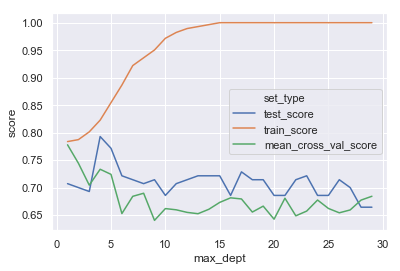

In [30]:
# Depth analysis results
classifier_score_data = pd.melt(classifier_score_data, id_vars=['max_dept'], var_name='set_type', value_name='score')
ax = sns.lineplot(x="max_dept", y="score",
                  hue="set_type", data=classifier_score_data)
# Will use 3 as a tree depth.

In [32]:
clf_depth_3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [33]:
clf_depth_3.fit(X_train, y_train)
clf_depth_3.score(X_train, y_train)

0.8014184397163121

In [34]:
clf_depth_3.score(X_test, y_test)

0.69285714285714284

In [36]:
# Perform cross validation test
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores.mean()

0.69533151059466847

In [38]:
# Count mean (chances of guessing right if assigning one result to all)
[data.num.mean(), 1 - data.num.mean()]

[0.46208530805687204, 0.5379146919431279]